In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
import numpy as np

In [4]:
dir_ = os.listdir('./datasets/flower_photos/')
dir_

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [5]:
img_dir = './datasets/flower_photos/'

In [7]:
img_size = (180, 180)
batch_size = 100

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    validation_split=0.2,
    subset='both',
    seed = 500,
    image_size= img_size,
    batch_size= batch_size
  )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.


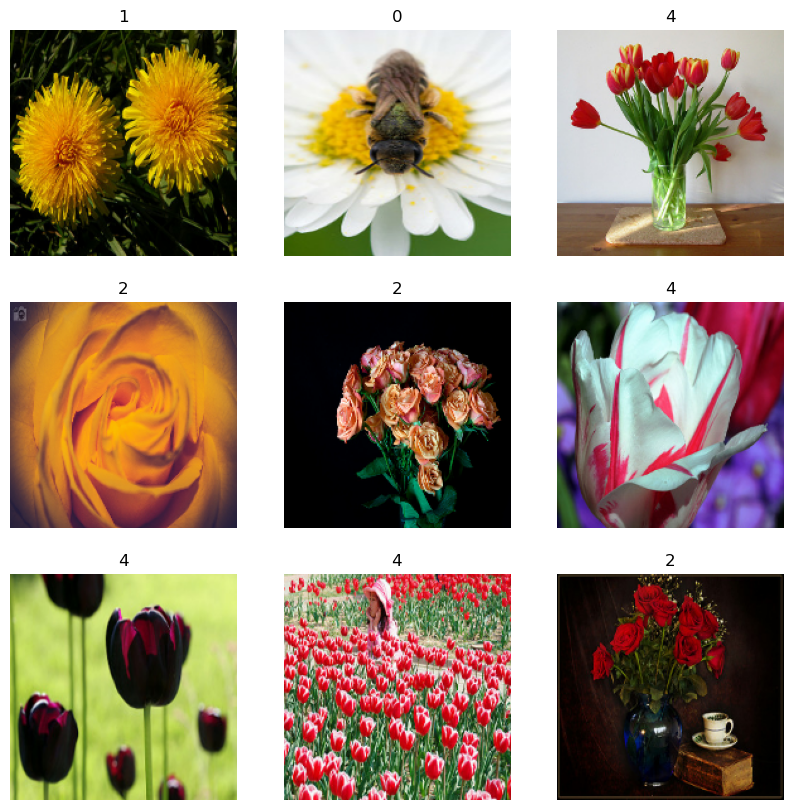

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [16]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip(),
    keras.layers.RandomZoom(1),
    keras.layers.RandomContrast(0.9)
])

In [ ]:
for images, labels in train_ds:
    for i in range(1):
        print(img)

In [29]:
def augmentation(image, labels):
    return data_augmentation(image), labels

In [23]:
train_ds = train_ds.map(lambda img, labels: (data_augmentation(img), labels), num_parallel_calls=tf.data.AUTOTUNE)

In [25]:
def scale(image, label):
    return image/255, label

In [26]:
train_ds = train_ds.map(scale)

In [27]:
for img, labels in train_ds.take(1):
    for i in range(1):
        print(img)

tf.Tensor(
[[[[0.22555521 0.27694303 0.15042287]
   [0.2298486  0.2799394  0.15045354]
   [0.2567409  0.32668787 0.1485432 ]
   ...
   [0.26385188 0.31159034 0.16924673]
   [0.2362662  0.2946331  0.15285283]
   [0.22682634 0.28006154 0.14687493]]

  [[0.22150433 0.26675805 0.14396513]
   [0.22845471 0.27471614 0.15077926]
   [0.23674016 0.28703704 0.15433426]
   ...
   [0.27596906 0.3301754  0.1914086 ]
   [0.26204172 0.32872167 0.17689247]
   [0.24781024 0.2980599  0.1749436 ]]

  [[0.22319475 0.2684076  0.1479349 ]
   [0.22960088 0.27888864 0.15363081]
   [0.23819287 0.29135162 0.15769525]
   ...
   [0.27160794 0.33505553 0.18606992]
   [0.26358122 0.33156946 0.17397079]
   [0.27885973 0.33430284 0.19148931]]

  ...

  [[0.2785681  0.32841736 0.18828657]
   [0.2536187  0.3139157  0.17237455]
   [0.2412037  0.30535337 0.16044836]
   ...
   [0.26576117 0.3281954  0.18911444]
   [0.25752485 0.31668556 0.17470673]
   [0.24729066 0.30969623 0.16635822]]

  [[0.28687492 0.33574486 0.185840

In [36]:
img_shape = img_size +(3,)

In [40]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), input_shape=img_shape, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

In [42]:
import graphviz, pydot

keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [44]:
model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(train_ds, epochs=50, workers = 4)

Epoch 1/50
